# Gender prediction by first name - Decision Trees

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0) # set seed

#models (algorithms)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#results validation
from sklearn.model_selection import train_test_split

#success metrics
from sklearn.metrics import accuracy_score

#visualization
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
df = pd.read_csv("../input/polish_names.csv")
df['target'] = df['gender'].map(lambda x: int(x == 'm'))

Function to train, predict and show result:

In [3]:
def train_and_predict_model(X_train, X_test, y_train, y_test, model, success_metric=accuracy_score):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Distribution:")
    print( pd.Series(y_pred).value_counts() )
    
    return success_metric(y_test, y_pred)

Features engineering:

In [4]:
vowels = ['a', 'ą', 'e', 'ę', 'i', 'o', 'u', 'y']

def how_many_vowels(name):
    return sum( map(lambda x: int(x in vowels), name.lower()) )
    
def first_is_vowel(name):
    return name.lower()[0] in vowels

def last_is_vowel(name):
    return name.lower()[-1] in vowels

def get_all_vowels(name):
    all_vowels = [letter for letter in name.lower() if letter in vowels]
    
    return ''.join(all_vowels)

def get_all_consonants(name):
    all_consonants = [letter for letter in name.lower() if letter not in vowels]
    
    return ''.join(all_consonants)

def feature_engineering(df):
    df['len_name'] = df['name'].map(lambda x: len(x))
    
    df['first_is_vowel'] = df['name'].map(first_is_vowel)
    df['last_is_vowel'] = df['name'].map(last_is_vowel)
    
    df['first_letter'] = df['name'].map(lambda x: x.lower()[0])
    df['first_letter_cnt'] = pd.factorize(df['first_letter'])[0]
    
    df['last_letter'] = df['name'].map(lambda x: x.lower()[-1])
    df['last_letter_cnt'] = pd.factorize(df['last_letter'])[0]
    
    df['all_vowels'] = df['name'].map(get_all_vowels)
    df['all_vowels_cnt'] = pd.factorize(df['all_vowels'])[0]

    df['all_consonants'] = df['name'].map(get_all_consonants)
    df['all_consonants_cnt'] = pd.factorize(df['all_consonants'])[0]
    
    
    return df  

In [6]:
df_fe = feature_engineering(df.copy())

In [7]:
df_fe.sample(20)

,name,gender,target,len_name,first_is_vowel,last_is_vowel,first_letter,first_letter_cnt,last_letter,last_letter_cnt,all_vowels,all_vowels_cnt,all_consonants,all_consonants_cnt
1341,Świętosława,f,0,11,False,True,ś,18,a,6,ięoaa,383,śwtsłw,1022
182,Bertram,m,1,7,False,False,b,1,m,3,ea,65,brtrm,151
33,Ageusz,m,1,6,True,False,a,0,z,2,aeu,2,gsz,30
1471,Wisława,f,0,7,False,True,w,22,a,6,iaa,168,wsłw,1103
499,Felicyta,f,0,8,False,True,f,5,a,6,eiya,224,flct,388
1496,Wojciech,m,1,8,False,False,w,22,h,15,oie,328,wjcch,1140
1033,Norman,m,1,6,False,False,n,13,n,0,oa,86,nrmn,789
1581,Debora,f,0,6,False,True,d,3,a,6,eoa,261,dbr,1206
548,Georgia,f,0,7,False,True,g,6,a,6,eoia,217,grg,429
984,Monika,f,0,6,False,True,m,12,a,6,oia,114,mnk,748


Selecting the choiced features to train model:

In [8]:
features = ['len_name', 'first_is_vowel', 'last_is_vowel', 'first_letter_cnt', 'last_letter_cnt', 'all_vowels_cnt', 'all_consonants_cnt']
X = df_fe[ features ]
y = df_fe['target']

train_and_predict_model(X, X, y, y, LogisticRegression(solver='lbfgs', max_iter=300))

Distribution:
1    964
0    741
dtype: int64


0.9524926686217009

Dividing data by train and test datasets:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (1193, 7) (1193,)
Test: (512, 7) (512,)


In [12]:
train_and_predict_model(X_train, X_test, y_train, y_test, LogisticRegression(solver='lbfgs', max_iter=300))

Distribution:
1    314
0    198
dtype: int64


0.962890625

## Learning curves

In [17]:
def draw_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

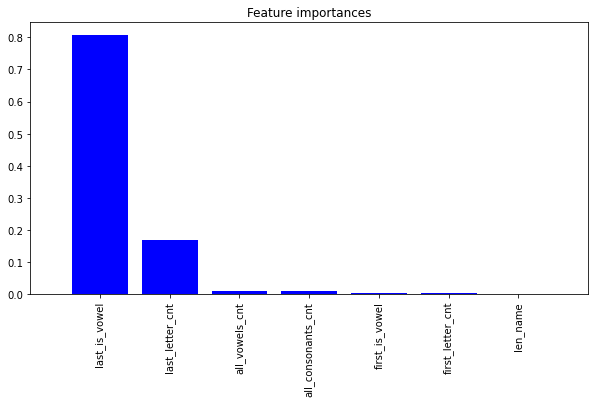

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

draw_feature_importances(model, features)